# Zuber: Impact Of External Factors On Rides

The analysis below is done for a new ride-sharing company, Zuber, that's launching in Chicago. The task is to find patterns in the available information, with the objective of understanding passener preference and the impact of external factors on rides.

## Table Of Contents

- [Dataset Description](#description)
    - [Inspecting Datasets](#inspect)
    - [Checking Missing Values](#miss)
    - [Checking Duplicate In Dataframe](#dup)
    - [Fixing Dataset](#fix)
- [Top 10 neighborhoods by drop-offs](#top)
- [Visual Analysis](#visual)
    - [Bar Graph: Taxi Companies VS. Number of Rides](#vs1)
    - [Bar Grapgh: Top 10 Neighbohoods vs Average Drop Offs](#vs2)
    - [Conclusion](#con)
- [Hypothesis Testing](#hyp)
- [General Conclusion](#gencon)

In [77]:
#importing used libraries 
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Dataset Description <br> 
<div id='description'></div>

- company_name: taxi company name <br>
- trips_amount: the number of rides for each taxi company on November 15-16, 2017 <br>
- dropoff_location_name: Chicago neighborhods where rides ended <br>
- average_trips: the average number of rides that ended in each neighborhood in November 2017 <br>
- start_ts: pickup date and time <br>
- weather_conditions: weather conditions at the moment the ride started<br>
- duration_seconds: ride duration in seconds <br>

In [78]:
#importing data 
try:
    df1 = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/DataCollectionAndStorage/moved_project_sql_result_01.csv')
    df2 = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/DataCollectionAndStorage/moved_project_sql_result_04.csv')
    df3 = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/DataCollectionAndStorage/moved_project_sql_result_07.csv')
except:
    df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
    df2 = pd.read_csv('/datasets/project_sql_result_04.csv')
    df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

### Inspecting Datasets<br>
<div id='inspect'></div>

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Comment: 

- Dataframe 1 there are 64 records and the datatypes are correct for the dataframe. <br>
- Dataframe 2 there are 94 records and the average_trips columns should be rounded up and converted to a integer as it is not possible to have half a trip even though this is the average. <br>
- Dataframe 3 there are 1068 records and the datatype of the start_ts column should be converted to a datetime datatype.

### Checking Missing Values<br>
<div id='miss'></div>

In [82]:
df1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [83]:
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [84]:
df3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Comment:

- There are no missing values in all three dataframes.

### Checking Duplicate In Dataframe<br>
<div id='duplicate'></div>

In [85]:
df1.duplicated().sum()

0

In [86]:
df2.duplicated().sum()

0

In [87]:
df3.duplicated().sum()

197

In [88]:
df3[df3.duplicated()==True]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Comment: 

- There are no duplicates for dataframe 1 and 2. The duplicates in dataframe 3 are due to the weather_conditions column and this is neglgible as the start_ts and duration_seconds columns are not the same.

## Fixing Dataset<br>
<div id='fix'></div>

In [89]:
#converting average_trips column to integer
df2['average_trips'] = df2['average_trips'].apply(lambda x: math.ceil(x))
df2['average_trips'] = df2['average_trips'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [90]:
#converting start_ts colummn to datetime datatype
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Top 10 neighborhoods by drop-offs<br>
<div id='top'></div>

In [91]:
df2desc = df2.sort_values(by='average_trips',ascending=False).head(10)
df2desc = df2desc.reset_index(drop=True)
df2desc.index = df2desc.index+1
df2desc

,dropoff_location_name,average_trips
1,Loop,10728
2,River North,9524
3,Streeterville,6665
4,West Loop,5164
5,O'Hare,2547
6,Lake View,2421
7,Grant Park,2069
8,Museum Campus,1510
9,Gold Coast,1365
10,Sheffield & DePaul,1260


Comment:

- The abouve table shows the top 10 neighborhood drop-offs for the month of November.

## Visual Analysis<br>
<div id='visual'></div>

### Bar Graph: Taxi Companies VS. Number of Rides<br>
<div id='vs1'></div>

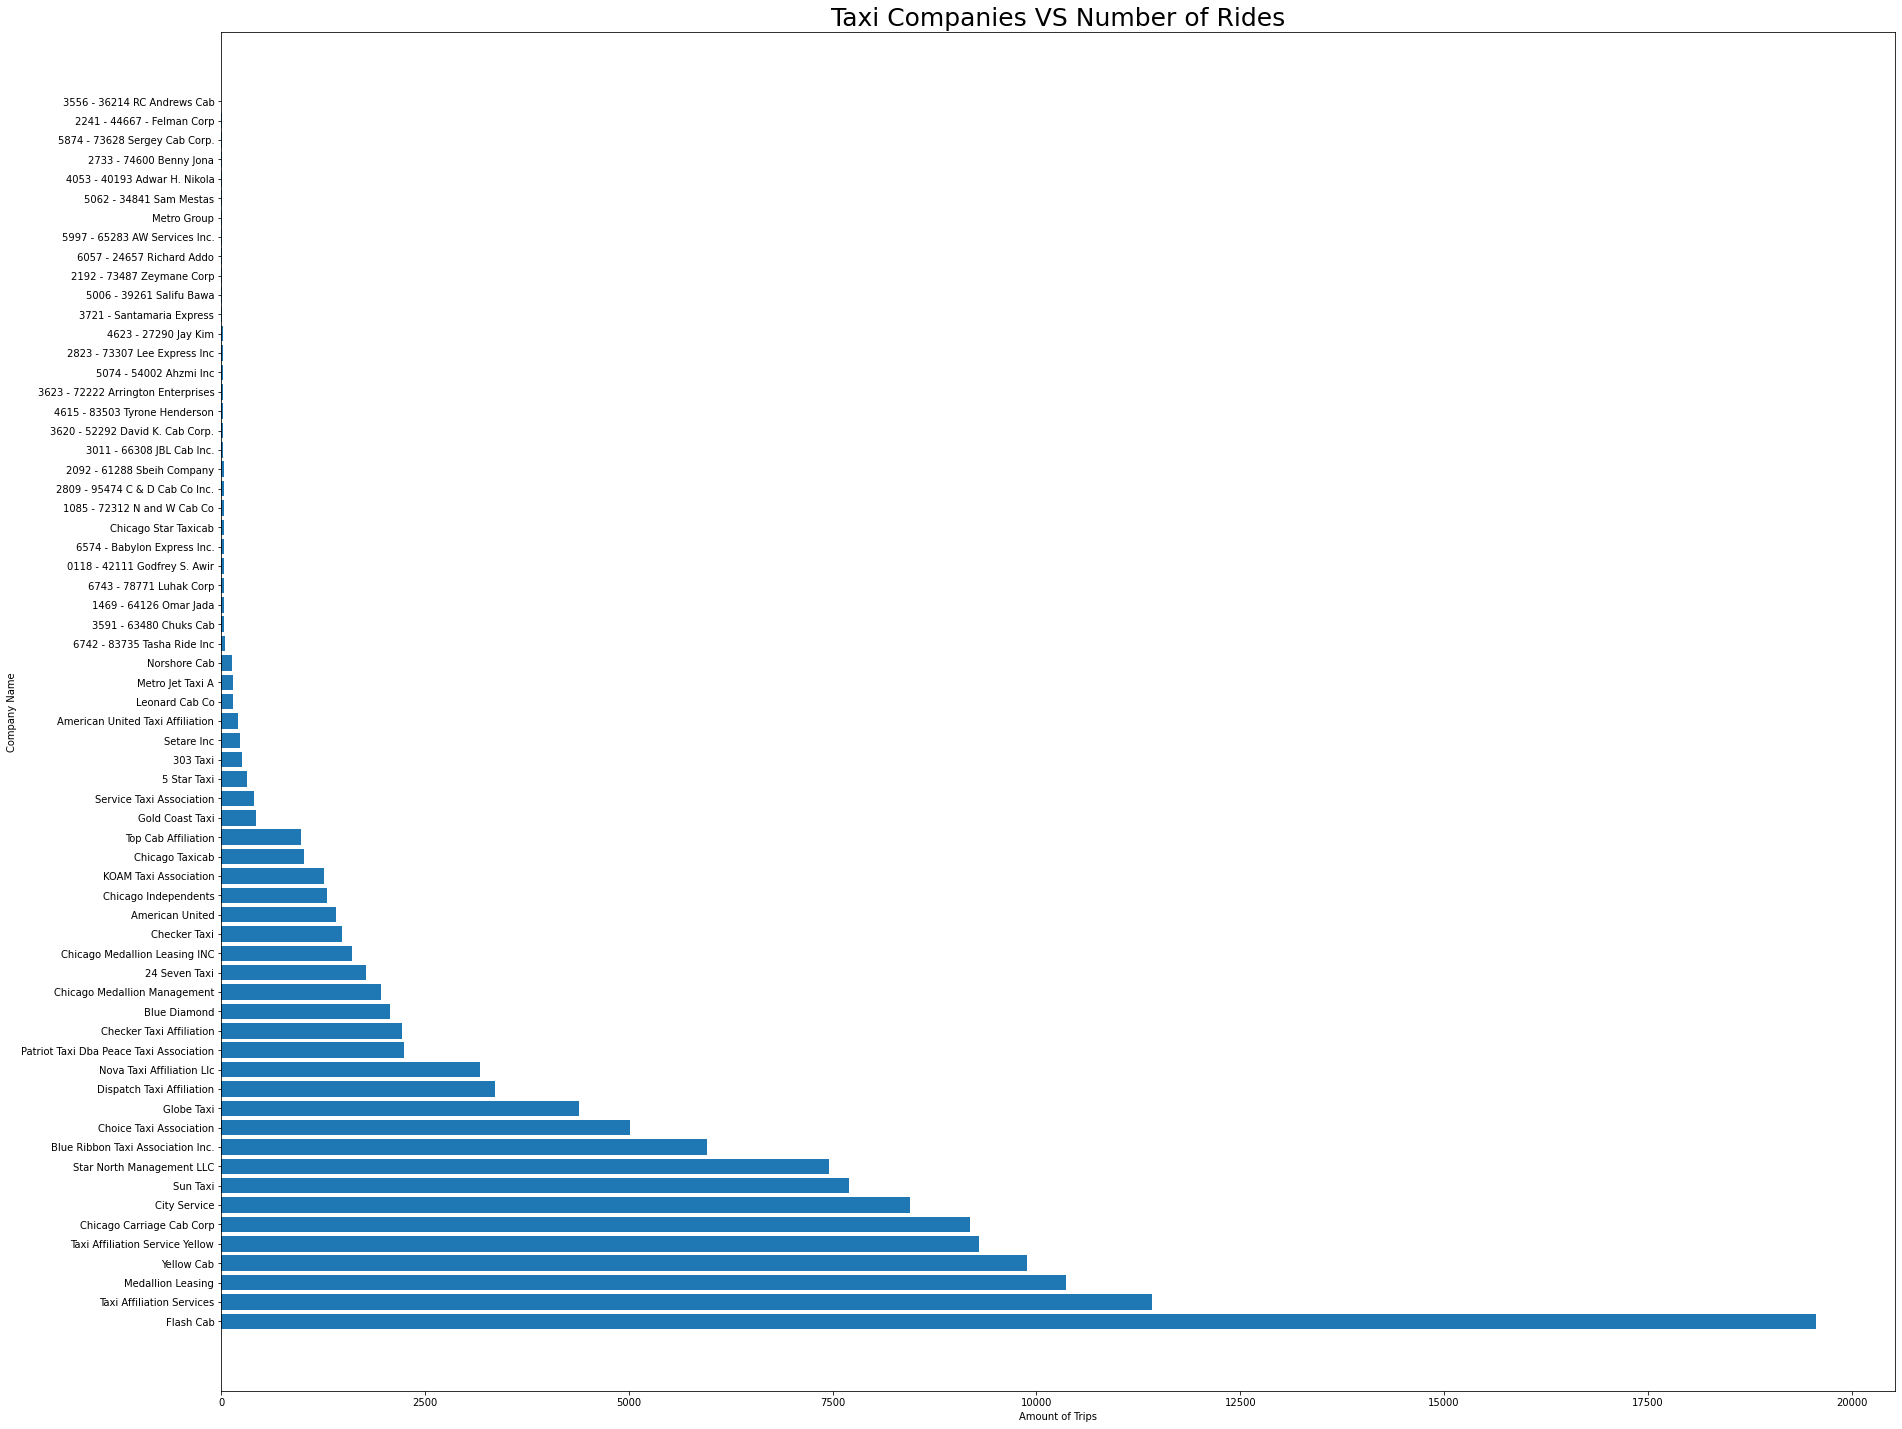

In [92]:
plt.figure(figsize=(30,25))
plt.barh(df1['company_name'],df1['trips_amount'])    
plt.xlabel('Amount of Trips')
plt.ylabel('Company Name')
plt.title('Taxi Companies VS Number of Rides',size=25)
plt.show()


### Bar Grapgh: Top 10 Neighbohoods vs Average Drop Offs <br>
<div id='vs2'></div>

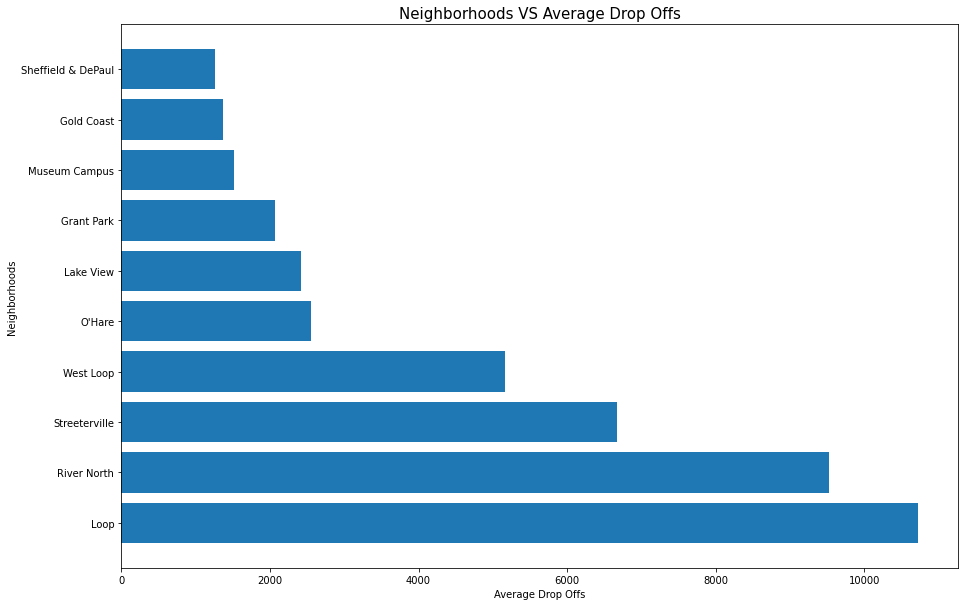

In [93]:
plt.figure(figsize=(15,10))
plt.barh(df2desc['dropoff_location_name'],df2desc['average_trips'])    
plt.ylabel('Neighborhoods')
plt.xlabel('Average Drop Offs')
plt.title('Neighborhoods VS Average Drop Offs',size=15)
plt.show()

### Conclusion<br>
<div id='con'></div>

From the Taxi companies vs. Number of rides graph it is evident that the taxi company with the most trips is the Flash Cab, followed by Taxi Affiliation Services then Medallion Leasing. The companies with the least trips are firstly 5874-73628 Sergey Cab Corp followed by 2241-44667-Felman Corp and lastly 3556-36214 RC Andrew Cab.

The neighborhood with the most drop offs is Loop, secondly River North and thirdly Streetville. From the graphs we can speculate that it's most likely that a trip will be provided by Flash Cab, Taxi Affiliation Services and Medallion Leasing and is most likely making a drop off to Loop, River North or Streetville.

## Hypothesis Testing<br>
<div id='hyp'></div>

Null hypothesis: The average duration of rides from the Loop t O'Hare International Airport stay the same on rainy Saturdays.<br>
Alternative hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [94]:
#checking types of weather conditions in dataframe
df3['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [95]:
#creating dataframe for non-rainy Saturdays
dfnotrainy = df3[df3['weather_conditions']=='Good']
dfnotrainy

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [96]:
#creating dataframe for rainy Saturdays
dfrainy = df3[df3['weather_conditions']=='Bad']
dfrainy

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [97]:
results = st.ttest_ind(dfnotrainy['duration_seconds'],dfrainy['duration_seconds'])

In [98]:
alpha = 0.05
print(f'alpha level: {alpha},pvalue: {results.pvalue}')
print()
if results.pvalue<alpha:
    print('We fail to reject the null in favour of the alternative')
else:
    print('We reject the null in favour of the alternative')

alpha level: 0.05,pvalue: 6.517970327099473e-12

We fail to reject the null in favour of the alternative


## General Conclusion<br>
<div id='gencon'></div>

What was completed in the project was uploading the labraries that were needed for the project. The data was then imported, inspected then cleaned. In the inspection phase it was found that there we no missing values in any of the dataframes and there we no duplicates in the dataframes. It was also found that the datatypes of the dataframe 3, column start_ts was string type and it was changed to a datetime type, as well as the average_trips column in dataframe 2 this column was changed from a float to a integer type and the values were rounded up. This was done to avoid the ambuguity of the decimals even though it was the average that was calculated.

The graphs plotted were the Taxi Companies VS. Number of Rides grapgh and the Top 10 Neighbohoods vs Average Drop Offs. In these graphs it was found that the top three taxi companies based on trips are:  Flash Cab, Taxi Affiliation Services,Medallion Leasing respectively. The top three neighborhoods with the most drop offs are Loop, River North, Streetville respectively.

Lastly, a hypthesis test was performed the alternative hypothesis formed was the rainy Saturdays the average duration of a ride changes and the null hypothesis was that it stays the same. A p-value was calculated and it was found that it lied below 0.05 meaning the null hypothesis holds true. Rainy weather conditions do not affect the duration of rides from the Loop to O'Hare International airport on Saturdays.